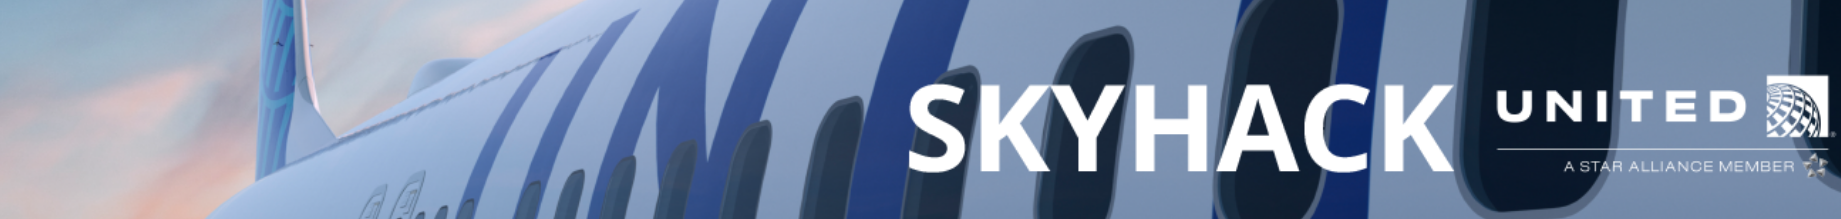

## United Airlines `SKYHACK` __ 0001

In [10]:
## loading packages and libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 40)

In [12]:
## reading the data 

raw_inf_ser_invent = pd.read_csv("Datasets/Inflight Service_Inventory data.csv")
raw_inf_ser_invent.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,09-01-2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,09-01-2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,09-02-2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,09-04-2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,09-08-2022,60549,Vegetarian chili and polenta cake,V,1,0


In [13]:
## loading `Survey data_Inflight Satisfaction Score.csv`

raw_survey_data = pd.read_excel("Datasets/Survey data_Inflight Satisfaction Score.xlsx", sheet_name = 'customers satisfaction')
raw_survey_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24,Early & Ontime,Economy,Economy,Domestic,2,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,10,Delayed,Business,NaN,Domestic,2,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-8,Early & Ontime,Business,NaN,Domestic,2,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11,Early & Ontime,Economy,Economy,Domestic,3,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,18,Delayed,Business,NaN,Domestic,2,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [14]:
survey_data = raw_survey_data.copy()
survey_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24,Early & Ontime,Economy,Economy,Domestic,2,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,10,Delayed,Business,NaN,Domestic,2,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-8,Early & Ontime,Business,NaN,Domestic,2,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11,Early & Ontime,Economy,Economy,Domestic,3,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,2022-01-09 00:00:00,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,18,Delayed,Business,NaN,Domestic,2,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [15]:
survey_data.shape

(34963, 31)

In [16]:
survey_data.isnull().sum()

flight_number                           0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
score                                   0
satisfaction_type                       0
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
cabin_name                          11847
entity                                  3
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level                9381
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                

In [17]:
survey_data.columns

Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'record_locator', 'scheduled_departure_date', 'question_text', 'score',
       'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes', 'arrival_delay_group', 'cabin_code_desc',
       'cabin_name', 'entity', 'number_of_legs', 'seat_factor_band',
       'loyalty_program_level', 'generation', 'fleet_type_description',
       'fleet_usage', 'equipment_type_code', 'ua_uax', 'actual_flown_miles',
       'haul_type', 'departure_gate', 'arrival_gate',
       'international_domestic_indicator', 'response_group', 'media_provider',
       'hub_spoke'],
      dtype='object')

In [18]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     34963 non-null  int64 
 1   origin_station_code               34963 non-null  object
 2   destination_station_code          34963 non-null  object
 3   record_locator                    34963 non-null  object
 4   scheduled_departure_date          34963 non-null  object
 5   question_text                     34963 non-null  object
 6   score                             34963 non-null  int64 
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 34963 non-null  object
 9   driver_sub_group2                 34963 non-null  object
 10  arrival_delay_minutes             34963 non-null  int64 
 11  arrival_delay_group               34963 non-null  object
 12  cabin_code_desc   

In [19]:
### creating month columns --> datecolumn is object

survey_data['scheduled_departure_date'] = survey_data['scheduled_departure_date'].astype('datetime64[ns]')
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flight_number                     34963 non-null  int64         
 1   origin_station_code               34963 non-null  object        
 2   destination_station_code          34963 non-null  object        
 3   record_locator                    34963 non-null  object        
 4   scheduled_departure_date          34963 non-null  datetime64[ns]
 5   question_text                     34963 non-null  object        
 6   score                             34963 non-null  int64         
 7   satisfaction_type                 34963 non-null  object        
 8   driver_sub_group1                 34963 non-null  object        
 9   driver_sub_group2                 34963 non-null  object        
 10  arrival_delay_minutes             34963 non-nu

In [20]:
## month column

survey_data['departure_month'] = survey_data['scheduled_departure_date'].dt.month
survey_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,departure_month
0,3802,MKX,ORX,CYXXJJ,2022-01-09,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24,Early & Ontime,Economy,Economy,Domestic,2,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure,1
1,4645,COX,DEX,DRXXMH,2022-01-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,10,Delayed,Business,NaN,Domestic,2,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure,1
2,5236,COX,DEX,DEXXS1,2022-01-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-8,Early & Ontime,Business,NaN,Domestic,2,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure,1
3,4686,DEX,COX,PXXXLH,2022-01-09,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11,Early & Ontime,Economy,Economy,Domestic,3,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure,1
4,671,DEX,COX,KZXXH5,2022-01-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,18,Delayed,Business,NaN,Domestic,2,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure,1


In [21]:
survey_data['departure_month'].value_counts()

9     22064
10     1362
6      1237
3      1218
11     1177
2      1175
7      1165
12     1160
4      1142
5      1131
1      1104
8      1028
Name: departure_month, dtype: int64

## Problem Statement 1 : 

Count of Satisfied and Dissatisfied customers (`satisfaction_type`):
    1) `departure_month`
    2) `arrival_delay_group`
    3) `cabin_code_desc`
        3.1) `cabin_name`
    4)  `entity`
    5) `number_of_legs`
    6) `generation`
    7) `fleet_usage`
    8) `actual_flown_miles`
    9) `haul_type`
    10) `international_domestic_indicator`
    11) `media_provider`
    12) `hub_spoke`

In [22]:
## result will the counts

summer_month = [6, 7, 8]
result = survey_data[survey_data['departure_month'].isin(summer_month)].groupby(['arrival_delay_group',
                                                                        'cabin_code_desc',
                                                                        'entity',
                                                                        'number_of_legs',
                                                                        'generation',
                                                                        'fleet_usage',
#                                                                         'actual_flown_miles',
                                                                        'haul_type',
                                                                        'international_domestic_indicator',
                                                                         'hub_spoke'])['satisfaction_type'].count()

result = pd.DataFrame(result)
result

satisfaction_type
arrival_delay_group cabin_code_desc     entity   number_of_legs generation fleet_usage haul_type international_domestic_indicator hub_spoke                         
Delayed             Business            Atlantic 1              Boomer     Mainline    Long      International                    hub departure                   16
                                                                                                                                  spoke departure                 17
                                                                Gen X      Mainline    Long      International                    hub departure                   10
                                                                                                                                  spoke departure                 11
                                                                Gen Z      Mainline    Long      International                    hub departure                    1
...                                                                                                                                                              ...
Early & Ontime      United Premium Plus Latin    2              Boomer     Mainline    Long      International                    spoke departure                  1
                                        Pacific  1              Boomer     Mainline    Long      International                    spoke departure                  1
                                                                Gen X      Mainline    Long      International                    hub departure                    2
                                                 2              Boomer     Mainline    Long      International                    hub departure                    1
                                                 3              Boomer     Mainline    Long      International                    hub departure                    1

[527 rows x 1 columns]

In [23]:
survey_data[survey_data['departure_month'].isin(summer_month)]

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,departure_month
5770,5721,SBX,ORX,F5XXDY,2022-06-09,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,13,Delayed,Economy,Economy,Domestic,2,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,84,Short,7,F21,Domestic,member,NaN,spoke departure,6
5771,3829,RIX,IAX,MBXX2D,2022-06-09,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy,Domestic,2,0 to 70,non-elite,Millennial,CRJ-200,Express,CRZ,UAX,99,Short,B4,A2A,Domestic,member,NaN,spoke departure,6
5772,5253,DEX,EGX,G7XX59,2022-06-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-6,Early & Ontime,Economy,Economy,Domestic,2,80+,non-elite,Millennial,ERJ-175,Express,E7Q,UAX,121,Short,B56,2,Domestic,member,GOGO,hub departure,6
5773,5194,VCX,IAX,GEXXFR,2022-06-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-33,Early & Ontime,Economy,Economy,Domestic,2,0 to 70,non-elite,Gen X,CRJ-200,Express,CRJ,UAX,123,Short,1,B3,Domestic,member,NaN,spoke departure,6
5774,4706,DEX,ASX,CSXXFX,2022-06-09,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-1,Early & Ontime,Business,NaN,Domestic,2,0 to 70,premier gold,Boomer,CRJ-700,Express,CR7,UAX,126,Short,B52,NaN,Domestic,member,GOGO,hub departure,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,2,SFX,SIX,IDXX3F,2022-08-09,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy,Pacific,3,90+,non-elite,Gen X,B787-9,Mainline,78P,UA,8440,Long,G1,F31,International,member,PANASONIC,hub departure,8
9196,2,SFX,SIX,DGXX70,2022-08-09,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy Plus,Pacific,2,90+,non-elite,Gen X,B787-9,Mainline,78P,UA,8440,Long,G1,F31,International,member,PANASONIC,hub departure,8
9197,3,SIX,SFX,GKXXE9,2022-08-09,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,42,Delayed,Business,NaN,Pacific,1,90+,premier 1k,Millennial,B787-9,Mainline,78P,UA,8440,Long,F59,G4,International,member,PANASONIC,spoke departure,8
9198,2,SFX,SIX,L8XXZ1,2022-08-09,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy Plus,Pacific,2,90+,non-elite,Millennial,B787-9,Mainline,78P,UA,8440,Long,G1,F31,International,member,PANASONIC,hub departure,8


In [24]:
## finding correlation between columns

columns = ['arrival_delay_group', 'cabin_code_desc', 'entity', 'number_of_legs', 'generation', 'fleet_usage',
           'actual_flown_miles', 'haul_type', 'international_domestic_indicator', 'hub_spoke', 'satisfaction_type']

# Calculate the correlation matrix
correlation_matrix = survey_data[columns].corr()

# Print the correlation matrix
print(correlation_matrix)

                    number_of_legs  actual_flown_miles
number_of_legs            1.000000           -0.141848
actual_flown_miles       -0.141848            1.000000


C:\Users\saiba\AppData\Local\Temp\ipykernel_14672\1487348302.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = survey_data[columns].corr()


### Using `LabelEncoder` to encode the columns

In [25]:
## encoding the columns

survey_data['arrival_delay_group'].value_counts()

Early & Ontime    24583
Delayed           10380
Name: arrival_delay_group, dtype: int64

In [26]:
## imorting libraries and packages

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

labelencoder = LabelEncoder()

In [27]:
## encoding the `arrival_delay_group`

survey_data['arrival_delay_group_encoded'] = labelencoder.fit_transform(survey_data['arrival_delay_group'])
survey_data[['arrival_delay_group', 'arrival_delay_group_encoded']].head(20)

,arrival_delay_group,arrival_delay_group_encoded
0,Early & Ontime,1
1,Delayed,0
2,Early & Ontime,1
3,Early & Ontime,1
4,Delayed,0
5,Delayed,0
6,Delayed,0
7,Early & Ontime,1
8,Early & Ontime,1
9,Delayed,0


In [28]:
## encoding the `cabin_code_desc`

survey_data['cabin_code_desc_encoded'] = labelencoder.fit_transform(survey_data['cabin_code_desc'])
survey_data[['cabin_code_desc', 'cabin_code_desc_encoded']].head(20)

,cabin_code_desc,cabin_code_desc_encoded
0,Economy,1
1,Business,0
2,Business,0
3,Economy,1
4,Business,0
5,Economy,1
6,Economy,1
7,Business,0
8,Economy,1
9,Economy,1


In [29]:
survey_data['entity'].value_counts() 

Domestic    23853
Atlantic     7627
Latin        2547
Pacific       933
Name: entity, dtype: int64

In [30]:
## encoding the `entity`

survey_data['entity_encoded'] = labelencoder.fit_transform(survey_data['entity'])
survey_data[['entity', 'entity_encoded']].head(20)
survey_data['entity_encoded'].value_counts()

1    23853
0     7627
2     2547
3      933
4        3
Name: entity_encoded, dtype: int64

In [31]:
survey_data['generation'].value_counts() 

Boomer        16367
Gen X         11088
Millennial     4979
Silent         1697
Gen Z           827
NBK               3
Greatest          2
Name: generation, dtype: int64

In [32]:
## encoding the `generation`

survey_data['generation_encoded'] = labelencoder.fit_transform(survey_data['generation'])
survey_data[['generation', 'generation_encoded']].head(20)
survey_data['generation_encoded'].value_counts()

0    16367
1    11088
4     4979
6     1697
2      827
5        3
3        2
Name: generation_encoded, dtype: int64

In [33]:
survey_data['fleet_usage'].value_counts() 

Mainline    29868
Express      5095
Name: fleet_usage, dtype: int64

In [34]:
## encoding the `fleet_usage`

survey_data['fleet_usage_encoded'] = labelencoder.fit_transform(survey_data['fleet_usage'])
survey_data[['fleet_usage', 'fleet_usage_encoded']].head(20)
survey_data['fleet_usage_encoded'].value_counts()

1    29868
0     5095
Name: fleet_usage_encoded, dtype: int64

In [35]:
survey_data['haul_type'].value_counts()  

Medium    21042
Long       9711
Short      4210
Name: haul_type, dtype: int64

In [36]:
## encoding the `haul_type`

survey_data['haul_type_encoded'] = labelencoder.fit_transform(survey_data['haul_type'])
survey_data[['haul_type', 'haul_type_encoded']].head(20)
survey_data['haul_type_encoded'].value_counts()

1    21042
0     9711
2     4210
Name: haul_type_encoded, dtype: int64

In [37]:
survey_data['international_domestic_indicator'].value_counts() 

Domestic         23853
International    11110
Name: international_domestic_indicator, dtype: int64

In [38]:
## encoding the `international_domestic_indicator`

survey_data['international_domestic_indicator_encoded'] = labelencoder.fit_transform(survey_data['international_domestic_indicator'])
survey_data[['international_domestic_indicator', 'international_domestic_indicator_encoded']].head(20)
survey_data['international_domestic_indicator_encoded'].value_counts()

0    23853
1    11110
Name: international_domestic_indicator_encoded, dtype: int64

In [39]:
survey_data['hub_spoke'].value_counts()

hub departure      18302
spoke departure    16661
Name: hub_spoke, dtype: int64

In [40]:
## encoding the `hub_spoke`

survey_data['hub_spoke_encoded'] = labelencoder.fit_transform(survey_data['hub_spoke'])
survey_data[['hub_spoke', 'hub_spoke_encoded']].head(20)
survey_data['hub_spoke_encoded'].value_counts()

0    18302
1    16661
Name: hub_spoke_encoded, dtype: int64

In [41]:
survey_data['satisfaction_type'].value_counts()

Dissatisfied    22353
Satisfied       12610
Name: satisfaction_type, dtype: int64

In [42]:
## encoding the `satisfaction_type`

survey_data['satisfaction_type_encoded'] = labelencoder.fit_transform(survey_data['satisfaction_type'])
survey_data[['satisfaction_type', 'satisfaction_type_encoded']].head(20)
survey_data['satisfaction_type_encoded'].value_counts()

0    22353
1    12610
Name: satisfaction_type_encoded, dtype: int64

### Correlation between imp columns

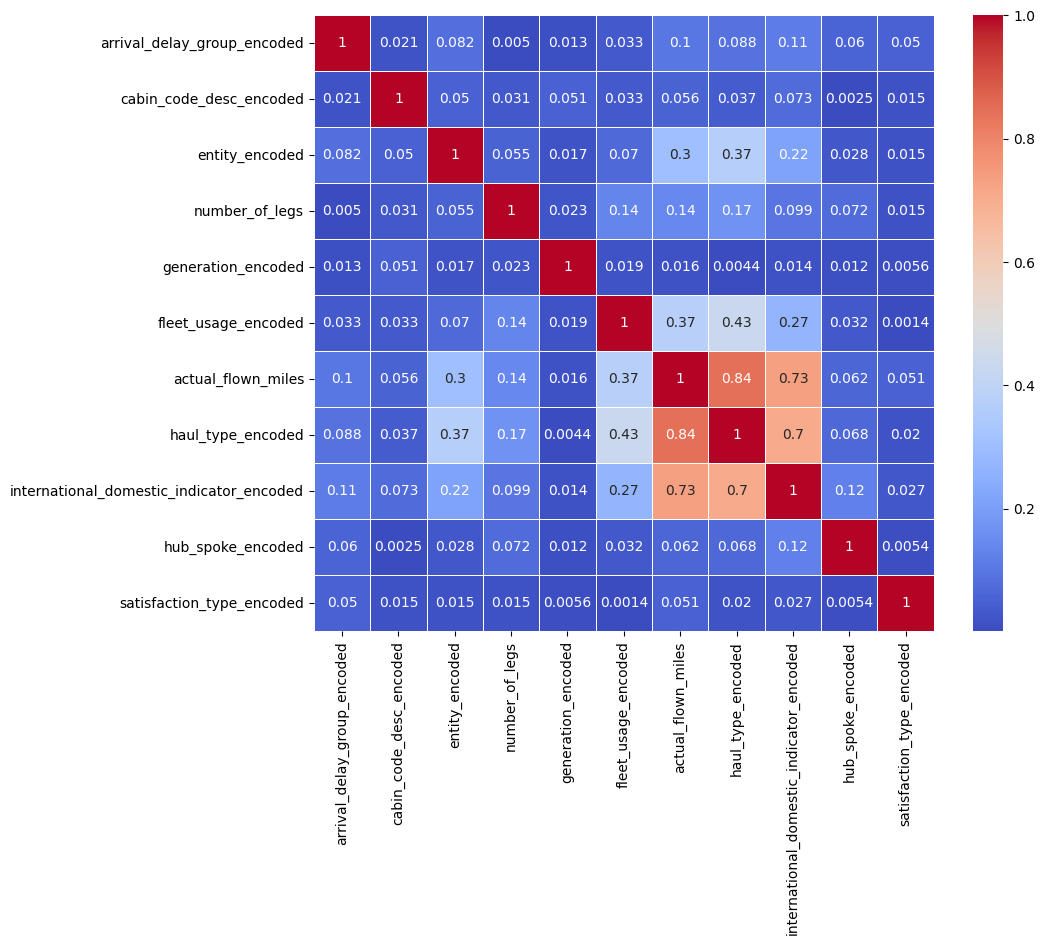

In [43]:
## finding correlation between columns

columns = ['arrival_delay_group_encoded', 'cabin_code_desc_encoded', 'entity_encoded', 'number_of_legs',
           'generation_encoded', 'fleet_usage_encoded', 'actual_flown_miles', 'haul_type_encoded', 
           'international_domestic_indicator_encoded', 'hub_spoke_encoded', 'satisfaction_type_encoded']

# Calculate the correlation matrix
correlation_matrix = survey_data[columns].corr().abs()

# Print the correlation matrix
# print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [44]:
## result will the counts

summer_month = [6, 7, 8]
result = survey_data[survey_data['departure_month'].isin(summer_month)].groupby(['arrival_delay_group',
                                                                        'cabin_code_desc',
                                                                        'entity',
                                                                        'number_of_legs',
                                                                        'generation',
                                                                        'fleet_usage',
#                                                                         'actual_flown_miles',
                                                                        'haul_type',
                                                                        'international_domestic_indicator',
                                                                         'hub_spoke'])['satisfaction_type'].value_counts().reset_index(name = 'satisfaction_rate').sort_values(by = 'satisfaction_rate', ascending = False)

result = pd.DataFrame(result)
result

,arrival_delay_group,cabin_code_desc,entity,number_of_legs,generation,fleet_usage,haul_type,international_domestic_indicator,hub_spoke,satisfaction_type,satisfaction_rate
527,Early & Ontime,Economy,Domestic,1,Boomer,Mainline,Medium,Domestic,hub departure,Dissatisfied,80
529,Early & Ontime,Economy,Domestic,1,Boomer,Mainline,Medium,Domestic,spoke departure,Dissatisfied,67
358,Early & Ontime,Business,Domestic,1,Boomer,Mainline,Medium,Domestic,hub departure,Dissatisfied,54
546,Early & Ontime,Economy,Domestic,1,Gen X,Mainline,Medium,Domestic,hub departure,Dissatisfied,52
530,Early & Ontime,Economy,Domestic,1,Boomer,Mainline,Medium,Domestic,spoke departure,Satisfied,48
...,...,...,...,...,...,...,...,...,...,...,...
457,Early & Ontime,Business,Latin,2,Gen X,Mainline,Medium,International,hub departure,Dissatisfied,1
456,Early & Ontime,Business,Latin,2,Boomer,Mainline,Medium,International,spoke departure,Dissatisfied,1
454,Early & Ontime,Business,Latin,2,Boomer,Mainline,Long,International,hub departure,Satisfied,1
453,Early & Ontime,Business,Latin,2,Boomer,Mainline,Long,International,hub departure,Dissatisfied,1


In [45]:
## result will the counts

summer_month = [6, 7, 8]
result = survey_data[survey_data['departure_month'].isin(summer_month)]['satisfaction_type'].value_counts()
result

Dissatisfied    2157
Satisfied       1273
Name: satisfaction_type, dtype: int64

In [46]:
survey_data['satisfaction_type'].value_counts()

Dissatisfied    22353
Satisfied       12610
Name: satisfaction_type, dtype: int64

## summer data with satisfaction in `food and beverage`

In [47]:
## summer satisfaction data

summer_survey_data = survey_data[survey_data['departure_month'].isin(summer_month)]
summer_survey_data

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,departure_month,arrival_delay_group_encoded,cabin_code_desc_encoded,entity_encoded,generation_encoded,fleet_usage_encoded,haul_type_encoded,international_domestic_indicator_encoded,hub_spoke_encoded,satisfaction_type_encoded
5770,5721,SBX,ORX,F5XXDY,2022-06-09,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,13,Delayed,Economy,Economy,Domestic,2,90+,non-elite,Boomer,CRJ-200,...,CRJ,UAX,84,Short,7,F21,Domestic,member,NaN,spoke departure,6,0,1,1,0,0,2,0,1,0
5771,3829,RIX,IAX,MBXX2D,2022-06-09,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy,Domestic,2,0 to 70,non-elite,Millennial,CRJ-200,...,CRZ,UAX,99,Short,B4,A2A,Domestic,member,NaN,spoke departure,6,1,1,1,4,0,2,0,1,0
5772,5253,DEX,EGX,G7XX59,2022-06-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-6,Early & Ontime,Economy,Economy,Domestic,2,80+,non-elite,Millennial,ERJ-175,...,E7Q,UAX,121,Short,B56,2,Domestic,member,GOGO,hub departure,6,1,1,1,4,0,2,0,0,1
5773,5194,VCX,IAX,GEXXFR,2022-06-09,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-33,Early & Ontime,Economy,Economy,Domestic,2,0 to 70,non-elite,Gen X,CRJ-200,...,CRJ,UAX,123,Short,1,B3,Domestic,member,NaN,spoke departure,6,1,1,1,1,0,2,0,1,1
5774,4706,DEX,ASX,CSXXFX,2022-06-09,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-1,Early & Ontime,Business,NaN,Domestic,2,0 to 70,premier gold,Boomer,CRJ-700,...,CR7,UAX,126,Short,B52,NaN,Domestic,member,GOGO,hub departure,6,1,0,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,2,SFX,SIX,IDXX3F,2022-08-09,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy,Pacific,3,90+,non-elite,Gen X,B787-9,...,78P,UA,8440,Long,G1,F31,International,member,PANASONIC,hub departure,8,1,1,3,1,1,0,1,0,1
9196,2,SFX,SIX,DGXX70,2022-08-09,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy Plus,Pacific,2,90+,non-elite,Gen X,B787-9,...,78P,UA,8440,Long,G1,F31,International,member,PANASONIC,hub departure,8,1,1,3,1,1,0,1,0,0
9197,3,SIX,SFX,GKXXE9,2022-08-09,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,42,Delayed,Business,NaN,Pacific,1,90+,premier 1k,Millennial,B787-9,...,78P,UA,8440,Long,F59,G4,International,member,PANASONIC,spoke departure,8,0,0,3,4,1,0,1,1,1
9198,2,SFX,SIX,L8XXZ1,2022-08-09,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-22,Early & Ontime,Economy,Economy Plus,Pacific,2,90+,non-elite,Millennial,B787-9,...,78P,UA,8440,Long,G1,F31,International,member,PANASONIC,hub departure,8,1,1,3,4,1,0,1,0,0


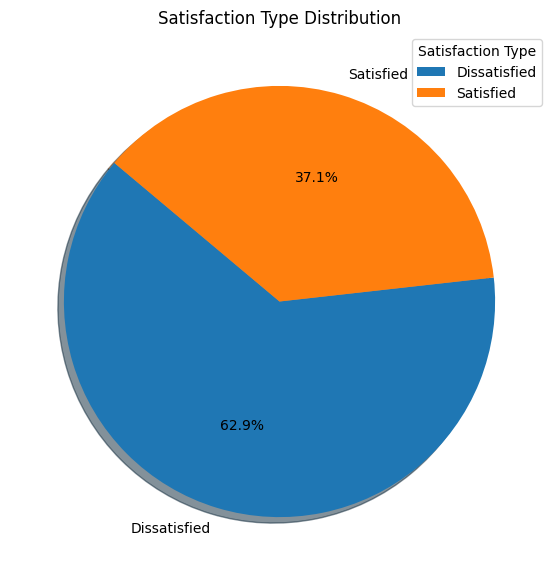

In [48]:
## value counts

plt.figure(figsize=(12,7))

# Assuming 'summer_survey_data' is your DataFrame
data_counts = summer_survey_data['satisfaction_type'].value_counts()

# Create a pie chart directly from the value_counts result
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a legend
plt.legend(data_counts.index, title='Satisfaction Type')

# Add a title
plt.title('Satisfaction Type Distribution')

# Show the chart
plt.show()

In [49]:
# summer_survey_data['satisfaction_type'].value_counts()

In [50]:
## changing the generation columns from string to range of year of born data

# survey_data['born_year_generation'] = survey_data.replace[survey_data['generation'] == 'Silent', '1928-1945']
# survey_data['born_year_generation'] = survey_data.replace[survey_data['generation'] == 'Boomer', '1946-1964']
# survey_data['born_year_generation'] = survey_data.replace[survey_data['generation'] == 'Gen X', '1965-1980']
# survey_data['born_year_generation'] = survey_data.replace[survey_data['generation'] == 'Millennial', '1981-1996']
# survey_data['born_year_generation'] = survey_data.replace[survey_data['generation'] == 'Gen Z', '1997-2012']


## defining dictionary to modify the result

generation_mapping = {
    'Boomer' : '1928-1945', 
    'Gen X' : '1946-1964', 
    'Gen Z' : '1965-1980', 
    'Millennial' : '1981-1996', 
    'Silent' : '1997-2012'
}


## creating new columns using map function
survey_data['born_year_generation'] = survey_data['generation'].map(generation_mapping)
# survey_data['born_year_generation'].sample(10)

In [51]:
import pandas as pd

summer_month = [6, 7, 8]

# Filter the data for summer months
summer_data = survey_data[survey_data['departure_month'].isin(summer_month)]

# Calculate satisfaction rate for each combination of attributes

result = summer_data.groupby([
    'arrival_delay_group',
    'generation',
    'born_year_generation',
    'haul_type',
    'international_domestic_indicator',
    'hub_spoke'
])['satisfaction_type'].value_counts().reset_index(name='satisfaction_rate')

## dataframe creation
aghih_satisfaction_data = pd.DataFrame(result)

# Display the result
# print(result)
aghih_satisfaction_data = aghih_satisfaction_data.sort_values(by = 'satisfaction_rate', ascending = False)


In [52]:
## variation of generation

aghih_satisfaction_data['generation'].unique()

array(['Boomer', 'Gen X', 'Millennial', 'Silent', 'Gen Z'], dtype=object)

### Customer Segmentation -

* `Silent` is anyone born from `1928` to `1945`.
* `Baby boomers` are anyone born from `1946` to `1964`.
* `Generation X` is anyone born from `1965` to `1980`.
* `Millennials` are anyone born from `1981` to `1996`.
* `Generation Z` is anyone born from `1997` to `2012`.

In [53]:
# summer_survey_data['fleet_usage'].sample(10)

In [54]:
## result will the counts

summer_month = [6, 7, 8]
summer_combine_res = survey_data[survey_data['departure_month'].isin(summer_month)].groupby(['arrival_delay_group',
                                                                        'cabin_code_desc',
                                                                        'entity',
                                                                        'number_of_legs',
                                                                        'generation',
                                                                        'born_year_generation',
                                                                        'fleet_usage',
#                                                                         'actual_flown_miles',
                                                                        'haul_type',
                                                                        'international_domestic_indicator',
                                                                         'hub_spoke'])['satisfaction_type'].value_counts().reset_index(name = 'satisfaction_rate').sort_values(by = 'satisfaction_rate', ascending = False)

## creating dataframe of it
summer_res = pd.DataFrame(summer_combine_res)
summer_res.head()

,arrival_delay_group,cabin_code_desc,entity,number_of_legs,generation,born_year_generation,fleet_usage,haul_type,international_domestic_indicator,hub_spoke,satisfaction_type,satisfaction_rate
527,Early & Ontime,Economy,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,hub departure,Dissatisfied,80
529,Early & Ontime,Economy,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,spoke departure,Dissatisfied,67
358,Early & Ontime,Business,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,hub departure,Dissatisfied,54
546,Early & Ontime,Economy,Domestic,1,Gen X,1946-1964,Mainline,Medium,Domestic,hub departure,Dissatisfied,52
530,Early & Ontime,Economy,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,spoke departure,Satisfied,48


In [55]:
## considering only the `dissatisfied` columns

dissatisfied_summer_res = summer_res[summer_res['satisfaction_type'] == 'Dissatisfied'] 
dissatisfied_summer_res.head()

,arrival_delay_group,cabin_code_desc,entity,number_of_legs,generation,born_year_generation,fleet_usage,haul_type,international_domestic_indicator,hub_spoke,satisfaction_type,satisfaction_rate
527,Early & Ontime,Economy,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,hub departure,Dissatisfied,80
529,Early & Ontime,Economy,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,spoke departure,Dissatisfied,67
358,Early & Ontime,Business,Domestic,1,Boomer,1928-1945,Mainline,Medium,Domestic,hub departure,Dissatisfied,54
546,Early & Ontime,Economy,Domestic,1,Gen X,1946-1964,Mainline,Medium,Domestic,hub departure,Dissatisfied,52
599,Early & Ontime,Economy,Domestic,2,Boomer,1928-1945,Mainline,Medium,Domestic,hub departure,Dissatisfied,46


### 1. How many of the dissatisfied rating were for `mainline`/`UA` or `Express`/`UAX` 

**Approach** :

Final output will show what's the average number of dissatisfied customers for every travelling flight for both`mainline` and `express` line

1. After grouping the columns, find out the total `dissatisfied` customers count and then finding `average` customers counts

In [56]:
# dissatisfied_summer_res[dissatisfied_summer_res['fleet_usage']]['satifaction_rate']

result1 = dissatisfied_summer_res.groupby(['fleet_usage'])['satisfaction_rate'].sum().reset_index().rename(columns = {
    'satisfaction_rate' : 'no_of_dissatified_count'
})

## total flights operating
result2 = dissatisfied_summer_res['fleet_usage'].value_counts().reset_index().rename(columns = {'index' : 'fleet_usage',
                                                                                               'fleet_usage' : 'no_of_fleets'})

# Create a pie chart directly from the value_counts result
# plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a legend
# plt.legend(data_counts.index, title='Satisfaction Type')

# Add a title
# plt.title('Satisfaction Type Distribution')

# Show the chart
# plt.show()


# final_result = result1['satisfaction_rate']/result2['fleet_usage']
# final_result

result2,result1

final_data = result1.merge(result2, on = 'fleet_usage')
final_data['dissatisfied_counts'] = final_data['no_of_dissatified_count']/final_data['no_of_fleets']
final_data

,fleet_usage,no_of_dissatified_count,no_of_fleets,dissatisfied_counts
0,Express,345,101,3.415842
1,Mainline,1812,345,5.252174


In [57]:
## final conclusion

dissatisfied_rating_UA_UAX = pd.DataFrame()

dissatisfied_rating_UA_UAX['fleet_usage'] = ['Express(UAX)', 'Mainline(UA)']

## new column where the number of dissatisfied ratings will be counted
dissatisfied_rating_UA_UAX['dissatisfied_counts'] = final_data['no_of_dissatified_count']/final_data['no_of_fleets']

## result
dissatisfied_rating_UA_UAX.sort_values(by = 'dissatisfied_counts', ascending=False)

,fleet_usage,dissatisfied_counts
1,Mainline(UA),5.252174
0,Express(UAX),3.415842


In [58]:
# dissatisfied_summer_res.groupby(['fleet_usage'])['satisfaction_rate'].mean()

**Conclusion** 

1. In every `Express(UAX)` flights on an average more than 3 persons are `not satisfied`
2. In every `Mainline(UA)` flights on an average more than 5 persons are `not satisfied`

### 2. `satisfied` and `dissatisfied` customers ratio for every outings

**Approach and Findings** : 

Final output will be the total no of Satisfied and Dissatisfied customers for every fleet usage and on an average satisfaction rate.

In [59]:
## total flights

total_flights = summer_res.groupby(['fleet_usage'])['satisfaction_type'].value_counts()
total_flights

fleet_usage  satisfaction_type
Express      Dissatisfied         101
             Satisfied             74
Mainline     Dissatisfied         345
             Satisfied            258
Name: satisfaction_type, dtype: int64

In [60]:
## grouping the columns of summer_res results on 'fleet_usage' and then finding the ratios

satisfied_dissatisfied_count = summer_res.groupby(['fleet_usage', 'satisfaction_type'])['satisfaction_rate'].sum().reset_index().rename(columns = 
                                                                                                                                        {'satisfaction_rate' : 'customer_count'})
avg_satisfied_dissatisfied = summer_res.groupby(['fleet_usage', 'satisfaction_type'])['satisfaction_rate'].mean().reset_index()
# satisfied_dissatisfied_count
# total_flights = summer_res['fleet_usage'].count()

satisfied_dissatisfied_count = pd.merge(satisfied_dissatisfied_count, avg_satisfied_dissatisfied,
                                                                  on = ['fleet_usage', 'satisfaction_type'])
satisfied_dissatisfied_count['no_of_flights'] = [101, 74, 345, 258]
# satisfied_dissatisfied_count

## reordeing the columns
new_order = ['fleet_usage', 'satisfaction_type', 'customer_count',
             'no_of_flights', 'satisfaction_rate']

satisfied_dissatisfied_count = satisfied_dissatisfied_count[new_order]
satisfied_dissatisfied_count

,fleet_usage,satisfaction_type,customer_count,no_of_flights,satisfaction_rate
0,Express,Dissatisfied,345,101,3.415842
1,Express,Satisfied,182,74,2.459459
2,Mainline,Dissatisfied,1812,345,5.252174
3,Mainline,Satisfied,1091,258,4.228682


**Conclusion** 

1. On an average more than 3 people are unsatisfied with Express fleet where more 5 people are unsatisfied with Mainline fleet. 
2. On an average less than 3 people satisfied with Express fleet and more than 4 people are satisfied with Mainline. 

## Important to notice that with `Mainline(UA)` flights customers are `more satisfied` as well as                         `more Dissatisfied`but with `Express(UAX)` customer `satisfaction rate` is less compare to `Dissatisfaction rate`.

------------------------------------------------------------------------------------------------  

### 3. analyzing the customer satifaction, `satisfaction_type`, with total distance travelled, `actual_flown_miles`

In [61]:
## creating the dataframe containing the customer satisfaction_type and actual_flown_miles 
## for both international and domestic flights during summer season only

# summer_month = []

flown_miles_satisfaction_type_flights_data = summer_data[['actual_flown_miles', 
                                                         'international_domestic_indicator',
                                                         'satisfaction_type_encoded',
                                                         'satisfaction_type']]

flown_miles_satisfaction_type_flights_data

,actual_flown_miles,international_domestic_indicator,satisfaction_type_encoded,satisfaction_type
5770,84,Domestic,0,Dissatisfied
5771,99,Domestic,0,Dissatisfied
5772,121,Domestic,1,Satisfied
5773,123,Domestic,1,Satisfied
5774,126,Domestic,0,Dissatisfied
...,...,...,...,...
9195,8440,International,1,Satisfied
9196,8440,International,0,Dissatisfied
9197,8440,International,1,Satisfied
9198,8440,International,0,Dissatisfied


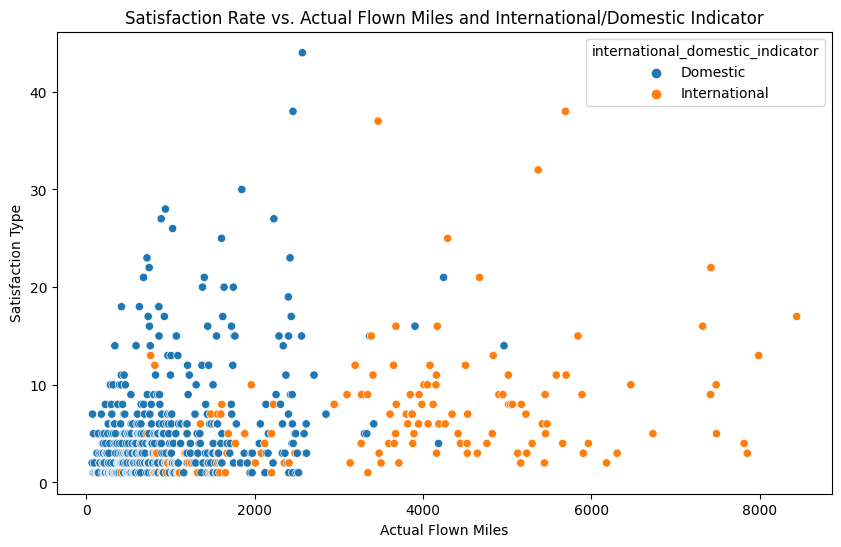

In [62]:
# Group the data by 'actual_flown_miles' and 'international_domestic_indicator' and calculate the mean satisfaction rate
flown_miles_satisfaction_type_flights_grp_data = flown_miles_satisfaction_type_flights_data.groupby(['actual_flown_miles', 'international_domestic_indicator'])['satisfaction_type_encoded'].count().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
# colors = flown_miles_satisfaction_type_flights_grp_data['satisfaction_type_encoded']
sns.scatterplot(
    x = flown_miles_satisfaction_type_flights_grp_data['actual_flown_miles'],
    hue = flown_miles_satisfaction_type_flights_grp_data['international_domestic_indicator'],
    y = flown_miles_satisfaction_type_flights_grp_data['satisfaction_type_encoded'],
#     c=colors,
#     cmap='coolwarm',
#     marker='o',
#     s=20
)
# plt.colormaps(label='Satisfaction Rate')  
plt.xlabel('Actual Flown Miles')
plt.ylabel('Satisfaction Type')
plt.title('Satisfaction Rate vs. Actual Flown Miles and International/Domestic Indicator')
plt.show()

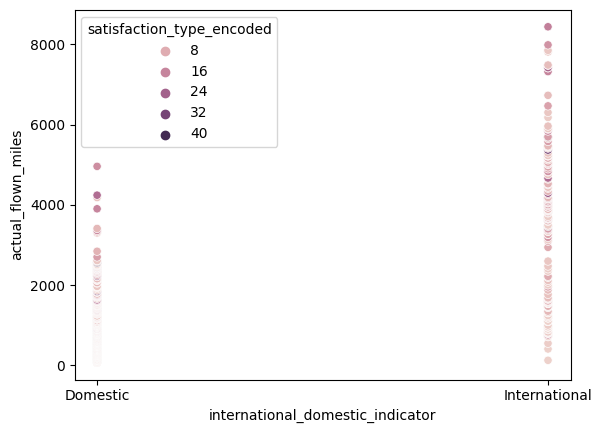

In [63]:
sns.scatterplot(y = 'actual_flown_miles', 
                x = 'international_domestic_indicator',
                hue = 'satisfaction_type_encoded',
                data = flown_miles_satisfaction_type_flights_grp_data)
plt.show() 

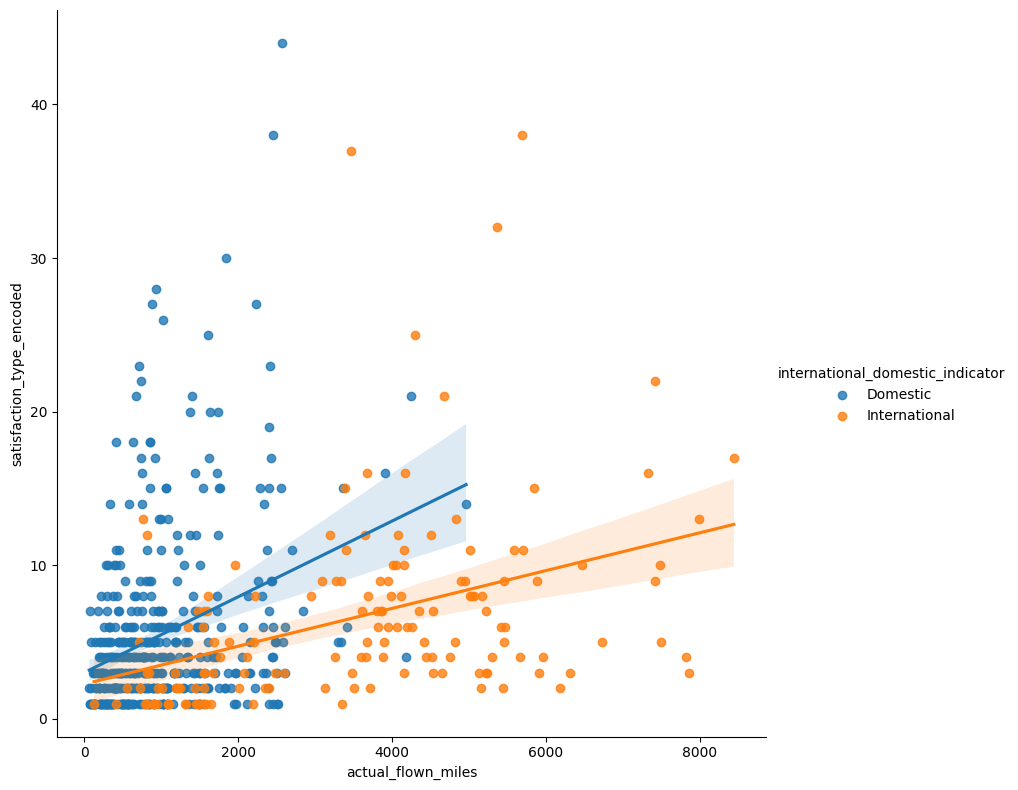

In [64]:
sns.lmplot(x = 'actual_flown_miles', 
           hue  = 'international_domestic_indicator',
           y = 'satisfaction_type_encoded',
           data = flown_miles_satisfaction_type_flights_grp_data,
           height = 8)
plt.show()  

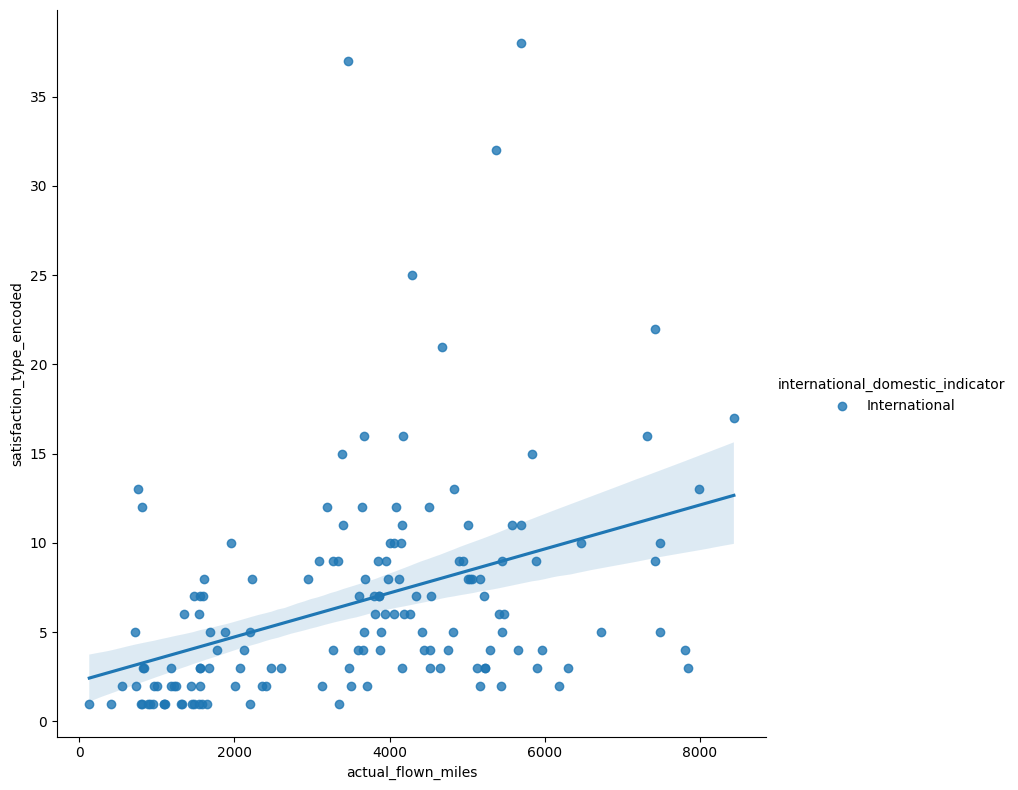

In [65]:
sns.lmplot(x = 'actual_flown_miles', 
                hue  = 'international_domestic_indicator',
                y = 'satisfaction_type_encoded',
                data = flown_miles_satisfaction_type_flights_grp_data[flown_miles_satisfaction_type_flights_grp_data['international_domestic_indicator'] == 'International'], 
                height = 8)
plt.show()  

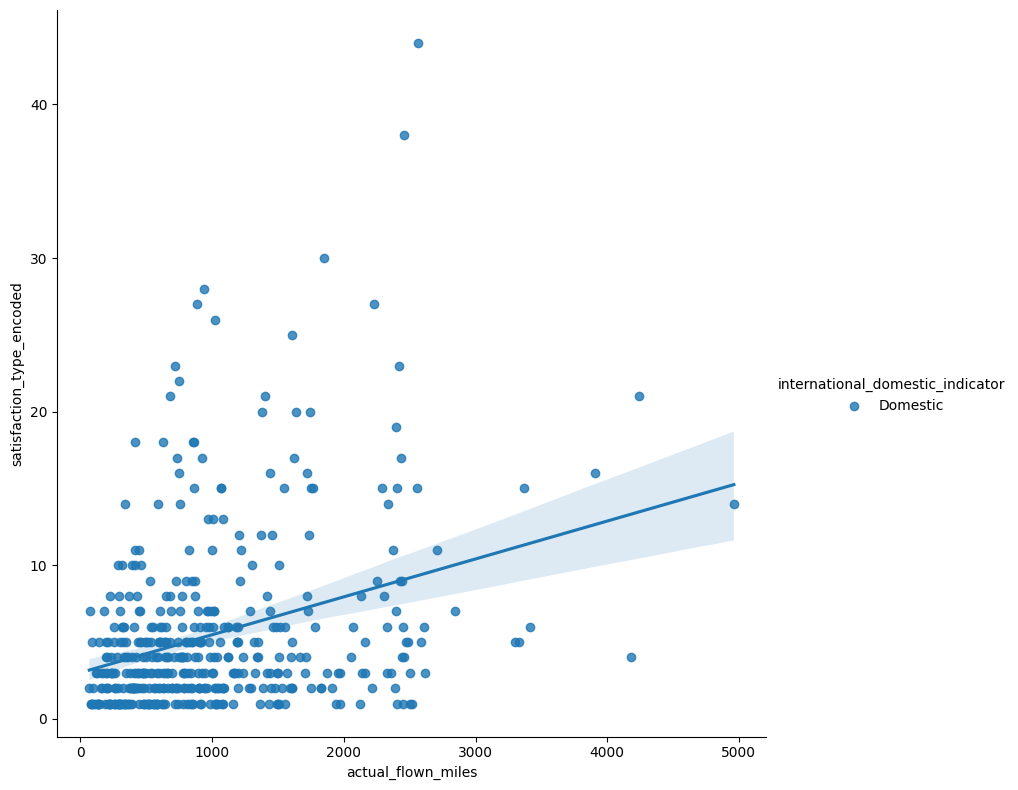

In [66]:
sns.lmplot(x = 'actual_flown_miles', 
                hue  = 'international_domestic_indicator',
                y = 'satisfaction_type_encoded',
                data = flown_miles_satisfaction_type_flights_grp_data[flown_miles_satisfaction_type_flights_grp_data['international_domestic_indicator'] == 'Domestic'], 
                height = 8)
plt.show()  

In [67]:
flown_miles_satisfaction_type_flights_grp_data

,actual_flown_miles,international_domestic_indicator,satisfaction_type_encoded
0,67,Domestic,2
1,72,Domestic,7
2,77,Domestic,1
3,81,Domestic,1
4,84,Domestic,5
...,...,...,...
591,7487,International,5
592,7815,International,4
593,7853,International,3
594,7989,International,13


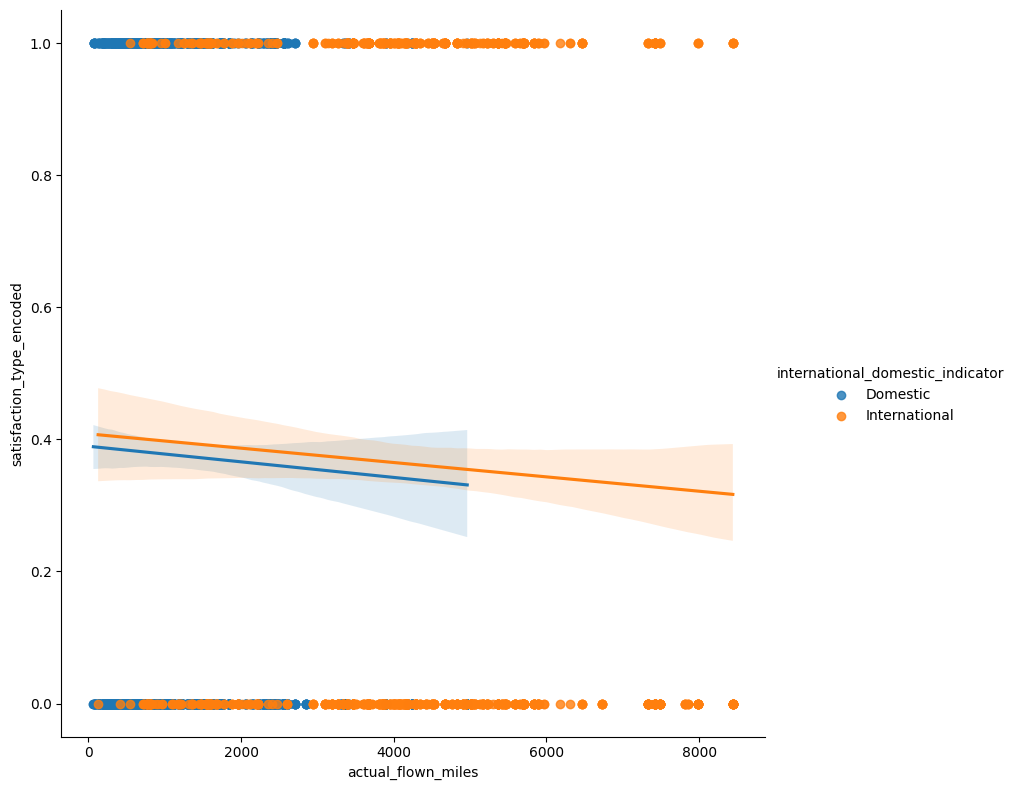

In [68]:
sns.lmplot(x = 'actual_flown_miles', 
                hue  = 'international_domestic_indicator',
                y = 'satisfaction_type_encoded',
                data = flown_miles_satisfaction_type_flights_data,
                height = 8)
plt.show() 